# Data preprocessing
* the real world data is often not clearn and has many issues like **missing values**, features on **different scales**, **non-numeric attributes** on certain features.
* So there is a need for **preprocessing** of the data.
* `sklearn` provides a rich set of **transformers** for this job
* the **same preprocessing** should be applied on both **training** and **test** dataset
* `sklearn` provides `pipeline` for making it easier to chain multiple transformers together and apply them uniformly across train, eval and test sets.

Once you get the training data, the first job is to explore the data and list down the preprocessing needed.

Typical problems include:
* Missing values in features
* Numerical features not on the same scale
* Categorical attributes need to be represented with sensible numerical transformation
* Too many features (reduce them)
* extract features from non-numerical data

### types of transformers in sklearn:
* Data cleaning (sklearn.preprocessing) such as standardization, missing value imputation, etc.
* Feature extraction (sklearn.feature_extraction)
* Feature reduction
* Feature expansion (sklearn.kernel_approximation)

### transformers methods:
* `fit()` method learns model parameters from the training dataset.
* `transform()` method applies learnt transformation to the new data.
* `fit_transform()` method combines both `fit()` and `transform()` and is convenient to use.

### `sklearn.feature_extraction()`:
* DictVectorizer
* FeatureHasher

### `DictVectorizer`:
* converts lists of mappings of feature name and feature values in to matrix


In [ ]:
from sklearn.feature_extraction import DictVectorizer

data = [
    {"age":4, "height":96},
    {"age":1, "height":73.9},
    {"age":3, "height":88.9},
    {"age":2, "height":81.6},
]

dv = DictVectorizer(sparse=False)
dv.fit_transform(data)

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

### `FeatureHasher`:

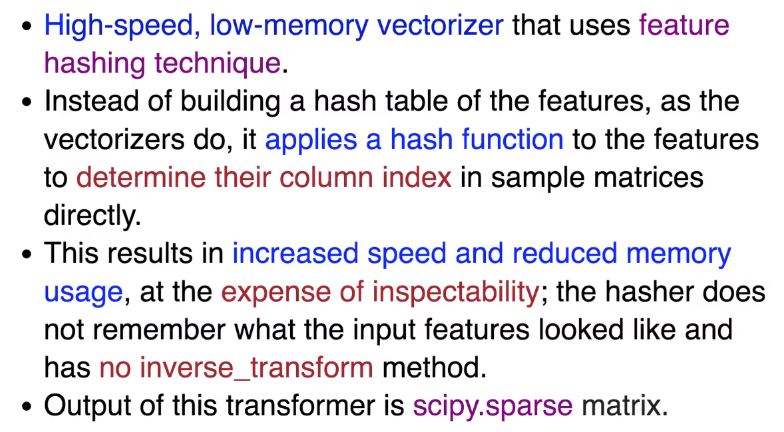

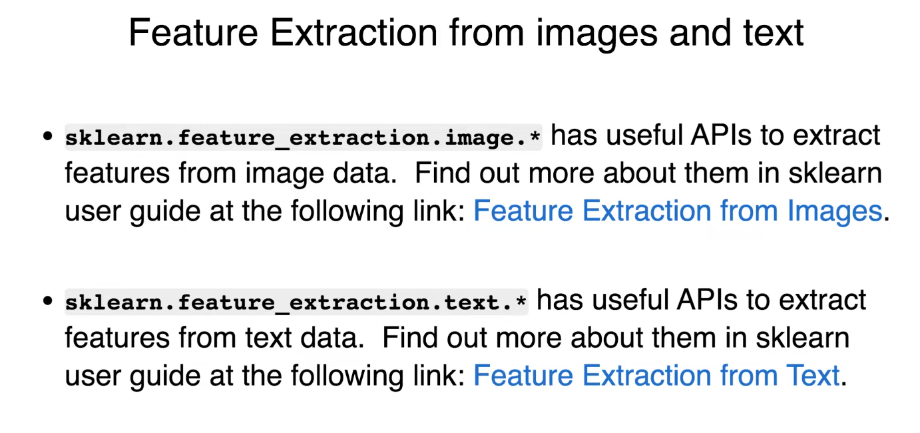

* use `sklearn.impute()` for filling missing values in a dataset
    * simpleImputer
    * KNNImputer
* MissingIndicator provides indicators for missing values

### SimpleImputer:
* fills the missing values with
    * mean
    * median
    * most_frequent
    * constant



In [6]:
from math import nan
import numpy as np

data = np.array([
    [7, 1],
    [nan, 8],
    [2, nan],
    [9, 6]])

from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy="mean")
si.fit_transform(data)

array([[7., 1.],
       [6., 8.],
       [2., 5.],
       [9., 6.]])

### KNNImputer:
* uses k-nearest neighbours approach.
* the missing value of an attribute in a specific example is filled with the mean value of the same attribute of `n_neighbors` closest neighbours
* the nearest neighbors are  decided by the Euclidean distance
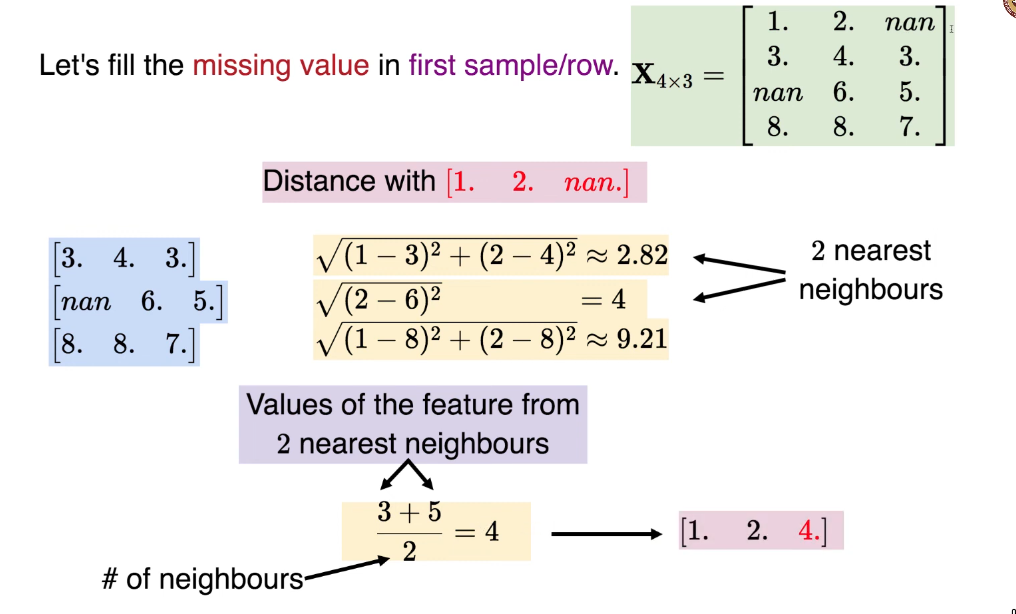

In [7]:
import numpy as np

data = np.array([
    [1, 2, nan],
    [3, 4, 3],
    [nan, 6, 5],
    [8, 8, 7]])

from sklearn.impute import KNNImputer

knni = KNNImputer(n_neighbors=2, weights="uniform")
knni.fit_transform(data)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

### MissingIndicators:
* it is useful to indicate the pressence of missing values
* MissingIndicators return a binary matrix
* true values correspond to the missing values